<a href="https://colab.research.google.com/github/shcho11/00.Projects_KoreaUniv_2023-1/blob/main/202304_DV_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (2023-1st Semester) Data Visualization - Midterm Assignment

# 1. Objectives
- 사이킷런에서 기본 제공하는 breast cancer dataset을 살펴보고, EDA 및 전처리를 수행, logistic regression 모델링을 수행하고 평가합니다. 또한, 전처리를 전혀 거치지 않은 raw dataset을 대상으로 수행한 모델과도 성능을 비교해보려 합니다.

-- Contents -- 
1. Objectives
2. Data Collection
3. Data Preparation
4. Exploratory Data Analysis & Preprocessing
5. Modeling 
6. Conclusion

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import math 

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
from IPython.display import Image
Image(url='https://www.researchgate.net/publication/347565521/figure/fig1/AS:1152001282981893@1651669917126/Benign-and-malignant-mammograms-of-breast-cancer-a-and-b-are-benign-c-and-d-are.png')

# 3. Data Preparation

In [ ]:
# sklearn dataset에서 제공하는 공통 key 

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
features = cancer['data']
features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
feature_names = cancer['feature_names']
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(len(feature_names.tolist()))

30


In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.DataFrame(features, columns=feature_names) # feature df 
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
pd.reset_option('all')

# 4. Exploratory Data Analysis & Preprocessing

## 4-1. exploring NULL distribution

In [ ]:
# df내 컬럼별 null을 얼마나 포함하고 있는지 알아보고자 합니다. 
# 이번 과제에서 사용할 사이킷런 제공 dataset의 경우 상당 부분 정제되어 있지만, 만일 null값 확인시 전처리가 필요합니다.

# 컬럼별 null값 포함하는 컬럼명과 수를 확인하는 함수를 정의합니다.

def nullcount_df(df) : 
  yesnull = []
  yesnull_name = []
  nonull = [] 
  nonull_name = []

  columns = df.columns.tolist() 

  for i in range(len(columns)) : 
    nullcount = df[columns[i]].isnull().sum()
    if nullcount > 0 : 
      yesnull.append(nullcount)
      yesnull_name.append(columns[i])
    else : 
      nonull.append(nullcount)
      nonull_name.append(columns[i])
  
  return yesnull, yesnull_name, nonull, nonull_name

In [ ]:
nullcount = nullcount_df(df)

In [ ]:
print("null을 포함하는 컬럼수     : ", len(nullcount[0]))
print("null을 포함하는 컬럼명     : ", nullcount[1], "\n")

print("null을 포함하지 않는 컬럼수 : ", len(nullcount[2]))
print("null을 포함하지 않는 컬럼명 : ", nullcount[3])

null을 포함하는 컬럼수     :  0
null을 포함하는 컬럼명     :  [] 

null을 포함하지 않는 컬럼수 :  30
null을 포함하지 않는 컬럼명 :  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## 4-2. exploring Correlation of the Features

In [ ]:
corr = df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'Correlation between the Original Features')

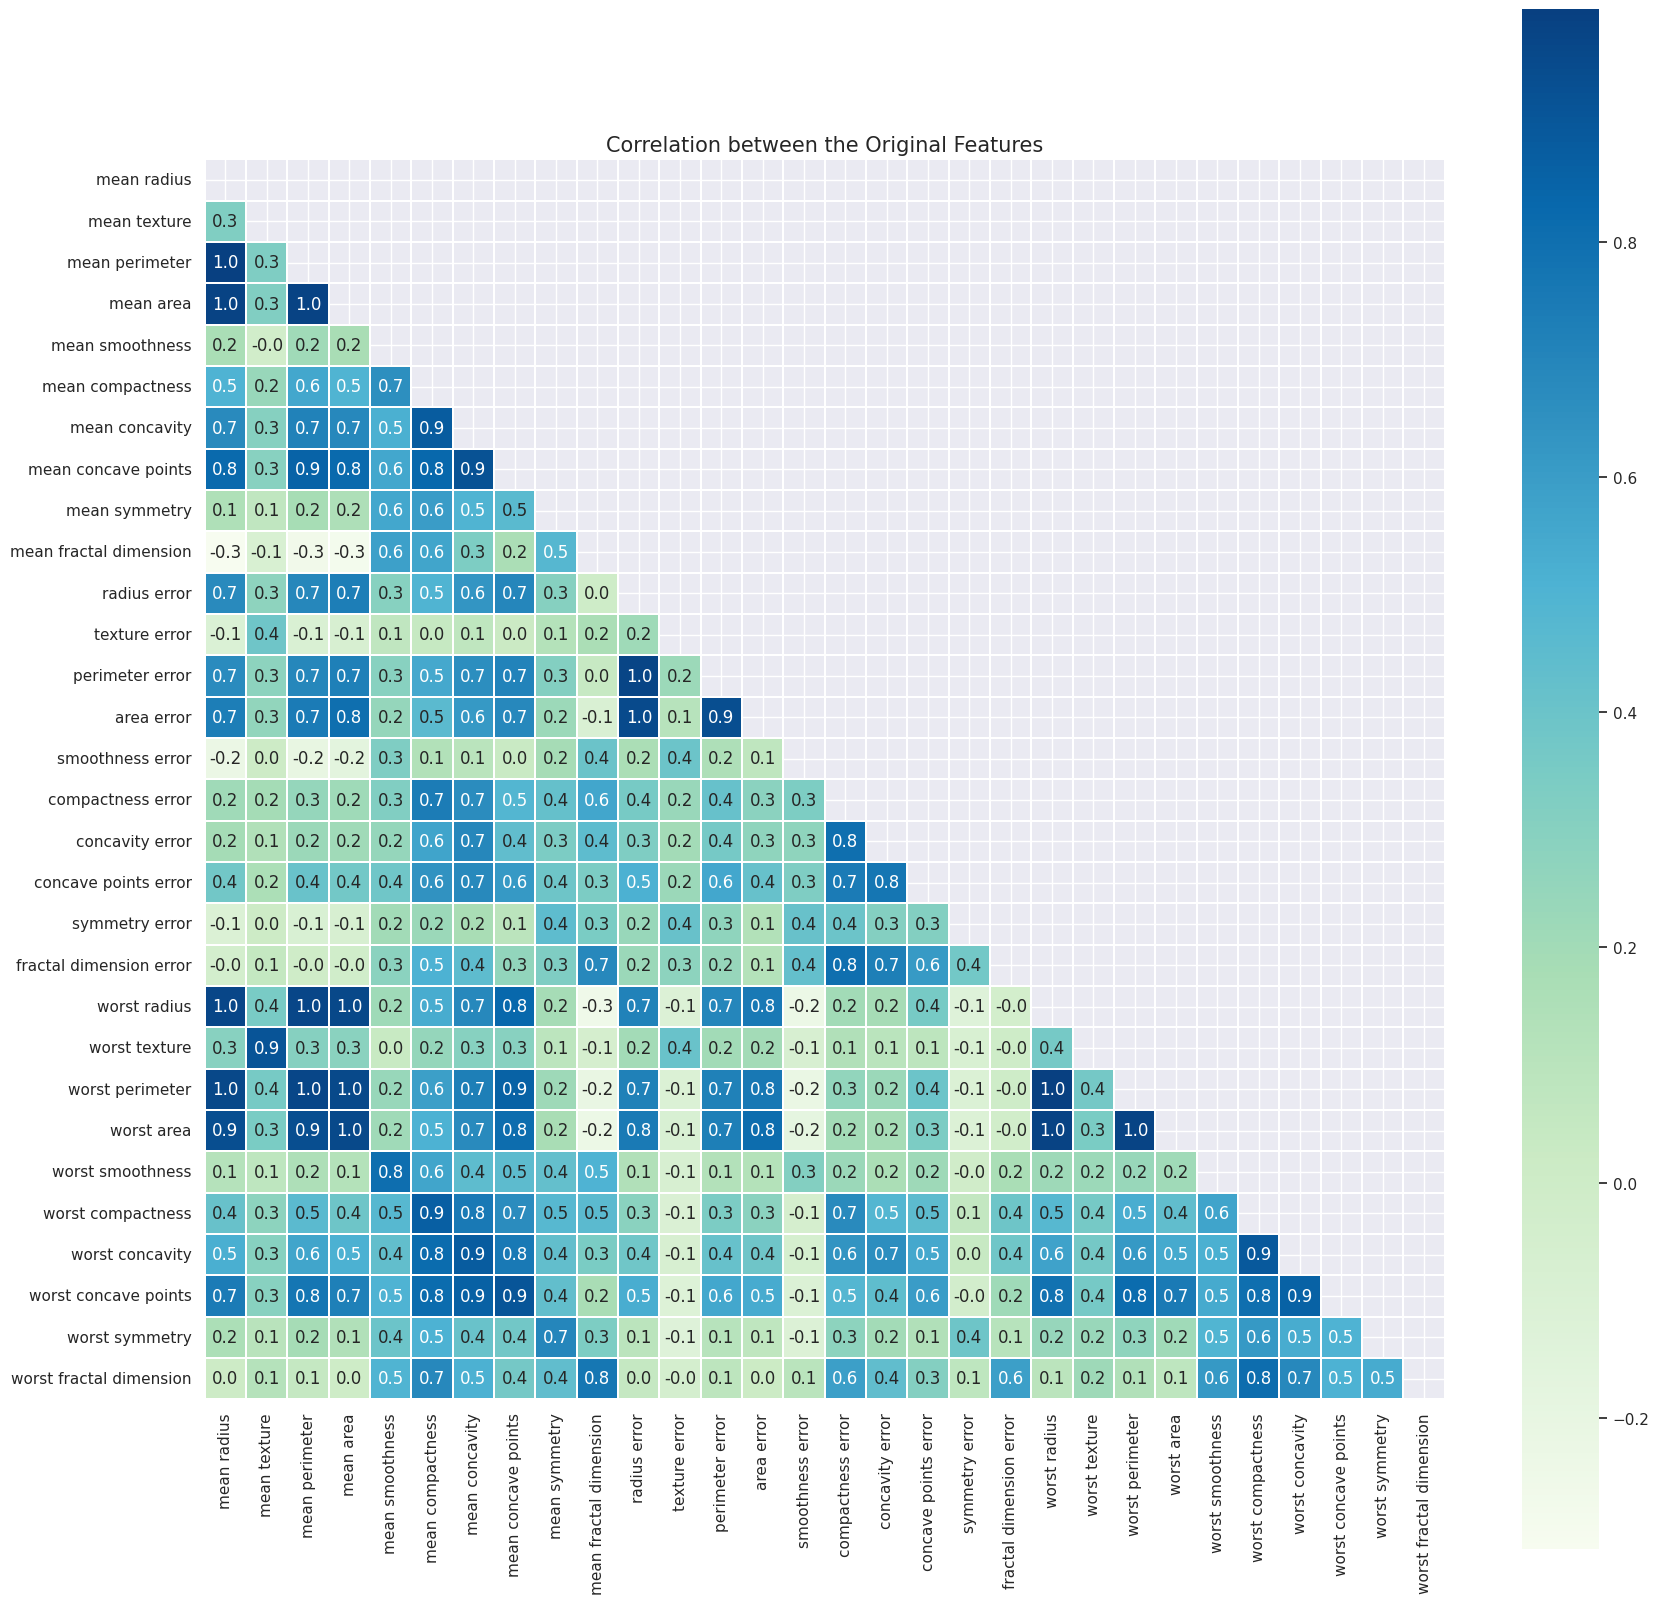

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
mask = np.zeros_like(corr, dtype=np.bool) # 매트릭스의 일부만을 플롯하기 위함.
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            annot = True,
            cmap = 'GnBu',
            square = True, 
            mask = mask,
            linewidths=0.2, 
            fmt = '.1f')

plt.title('Correlation between the Original Features', fontsize=15)

## 4-3. Dropping Variables which can cause multi-collinearity problem


In [ ]:
# 각 features마다 highly correlated 되어있는 features들의 집합을 리스트로 만들어봅니다.

columns = df.columns.tolist()
highcoliear_concat = []

for i in columns : 
  highcolinear = corr.loc[corr[i] > 0.7].index.tolist() # corr가 0.7보다 큰 features를 대상으로 해보기.
  highcolinear.remove(i) # list에서 자기자신은 제외. 
  highcoliear_concat.append(highcolinear)

In [ ]:
# concat리스트 내 포함 features별 갯수 확인

import itertools
from collections import Counter 

highcolinears = list(itertools.chain(*highcoliear_concat))
result = Counter(highcolinears)
print(result)

Counter({'mean concave points': 11, 'worst perimeter': 11, 'worst concave points': 11, 'mean area': 10, 'worst area': 10, 'mean perimeter': 9, 'worst radius': 9, 'area error': 8, 'mean radius': 8, 'mean concavity': 7, 'radius error': 6, 'perimeter error': 6, 'mean compactness': 6, 'worst compactness': 5, 'worst concavity': 5, 'compactness error': 4, 'concavity error': 3, 'worst fractal dimension': 2, 'concave points error': 2, 'fractal dimension error': 2, 'worst texture': 1, 'worst smoothness': 1, 'mean texture': 1, 'mean smoothness': 1, 'mean fractal dimension': 1})


In [ ]:
# concat리스트의 unique values

u_highcolinear_concat = []

for x in highcolinears : 
  if x not in u_highcolinear_concat : 
    u_highcolinear_concat.append(x)
  else : 
    continue

In [ ]:
u_highcolinear_concat

['mean perimeter',
 'mean area',
 'mean concave points',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points',
 'worst texture',
 'mean radius',
 'mean concavity',
 'radius error',
 'perimeter error',
 'worst smoothness',
 'compactness error',
 'worst compactness',
 'worst concavity',
 'mean compactness',
 'worst fractal dimension',
 'concavity error',
 'concave points error',
 'fractal dimension error',
 'mean texture',
 'mean smoothness',
 'mean fractal dimension']

In [ ]:
print(len(u_highcolinear_concat))

25


In [ ]:
mostcommon = result.most_common(15)
keyitems = []

for i in range(15) : 
  key = mostcommon[i][0]
  keyitems.append(key)

print(keyitems)

['mean concave points', 'worst perimeter', 'worst concave points', 'mean area', 'worst area', 'mean perimeter', 'worst radius', 'area error', 'mean radius', 'mean concavity', 'radius error', 'perimeter error', 'mean compactness', 'worst compactness', 'worst concavity']


In [ ]:
for key, value in mostcommon : 
  print(key, " : ", value)

mean concave points  :  11
worst perimeter  :  11
worst concave points  :  11
mean area  :  10
worst area  :  10
mean perimeter  :  9
worst radius  :  9
area error  :  8
mean radius  :  8
mean concavity  :  7
radius error  :  6
perimeter error  :  6
mean compactness  :  6
worst compactness  :  5
worst concavity  :  5


In [ ]:
# 쓰지 않을 features를 제외한 df1를 만들어줍니다.

df1 = df.copy()

df1.drop(columns = keyitems, inplace=True)
df1.head()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst symmetry,worst fractal dimension
0,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.4601,0.11890
1,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.2750,0.08902
2,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.3613,0.08758
3,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.6638,0.17300
4,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2364,0.07678


Text(0.5, 1.0, 'Correlation between the Features after Cleansing 1')

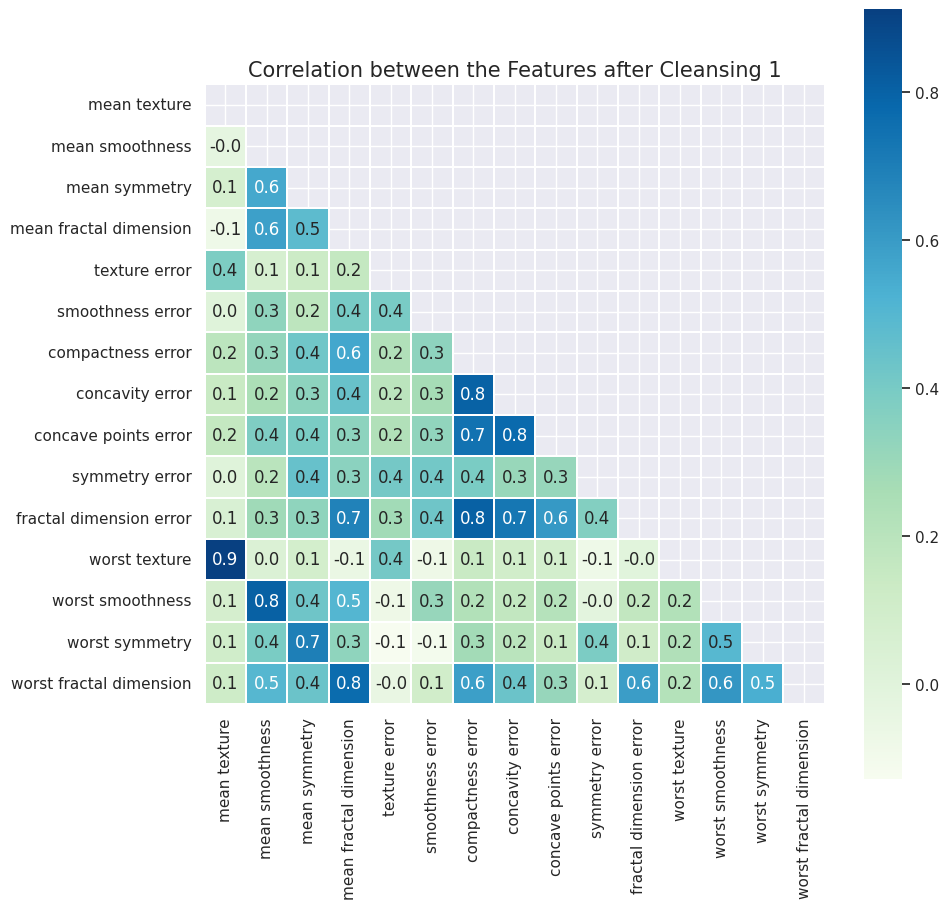

In [ ]:
corr1 = df1.corr()

sns.set(rc = {'figure.figsize':(10,10)})
mask = np.zeros_like(corr1, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr1,
            annot = True, 
            cmap = 'GnBu',
            square = True, 
            mask = mask,
            linewidths=0.2, 
            fmt = '.1f')

plt.title('Correlation between the Features after Cleansing 1', fontsize=15)

### worst 와 mean 동시에 존재하는 features에 대해서 'worst' 컬럼 4개 추가제거

In [ ]:
df1_cols = df1.columns.tolist()
worst_df1 = [item for item in df1_cols if 'worst' in item]
worst_df1

['worst texture',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension']

In [ ]:
df11 = df1.copy()

df11.drop(columns = worst_df1, inplace=True)
df11.head()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


Text(0.5, 1.0, 'Correlation between the Features after Cleansing 2')

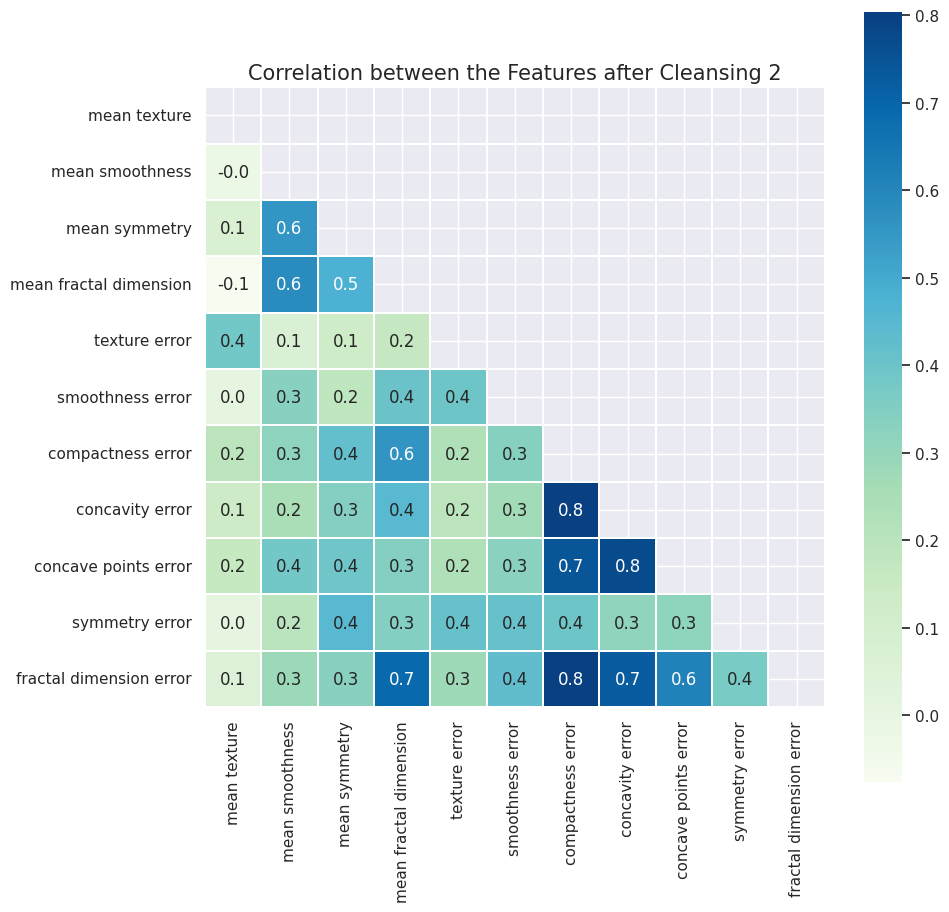

In [ ]:
corr11 = df11.corr()

sns.set(rc = {'figure.figsize':(10,10)})
mask = np.zeros_like(corr11, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr11,
            annot = True, 
            cmap = 'GnBu',
            square = True, 
            mask = mask,
            linewidths=0.2, 
            fmt = '.1f')

plt.title('Correlation between the Features after Cleansing 2', fontsize=15)

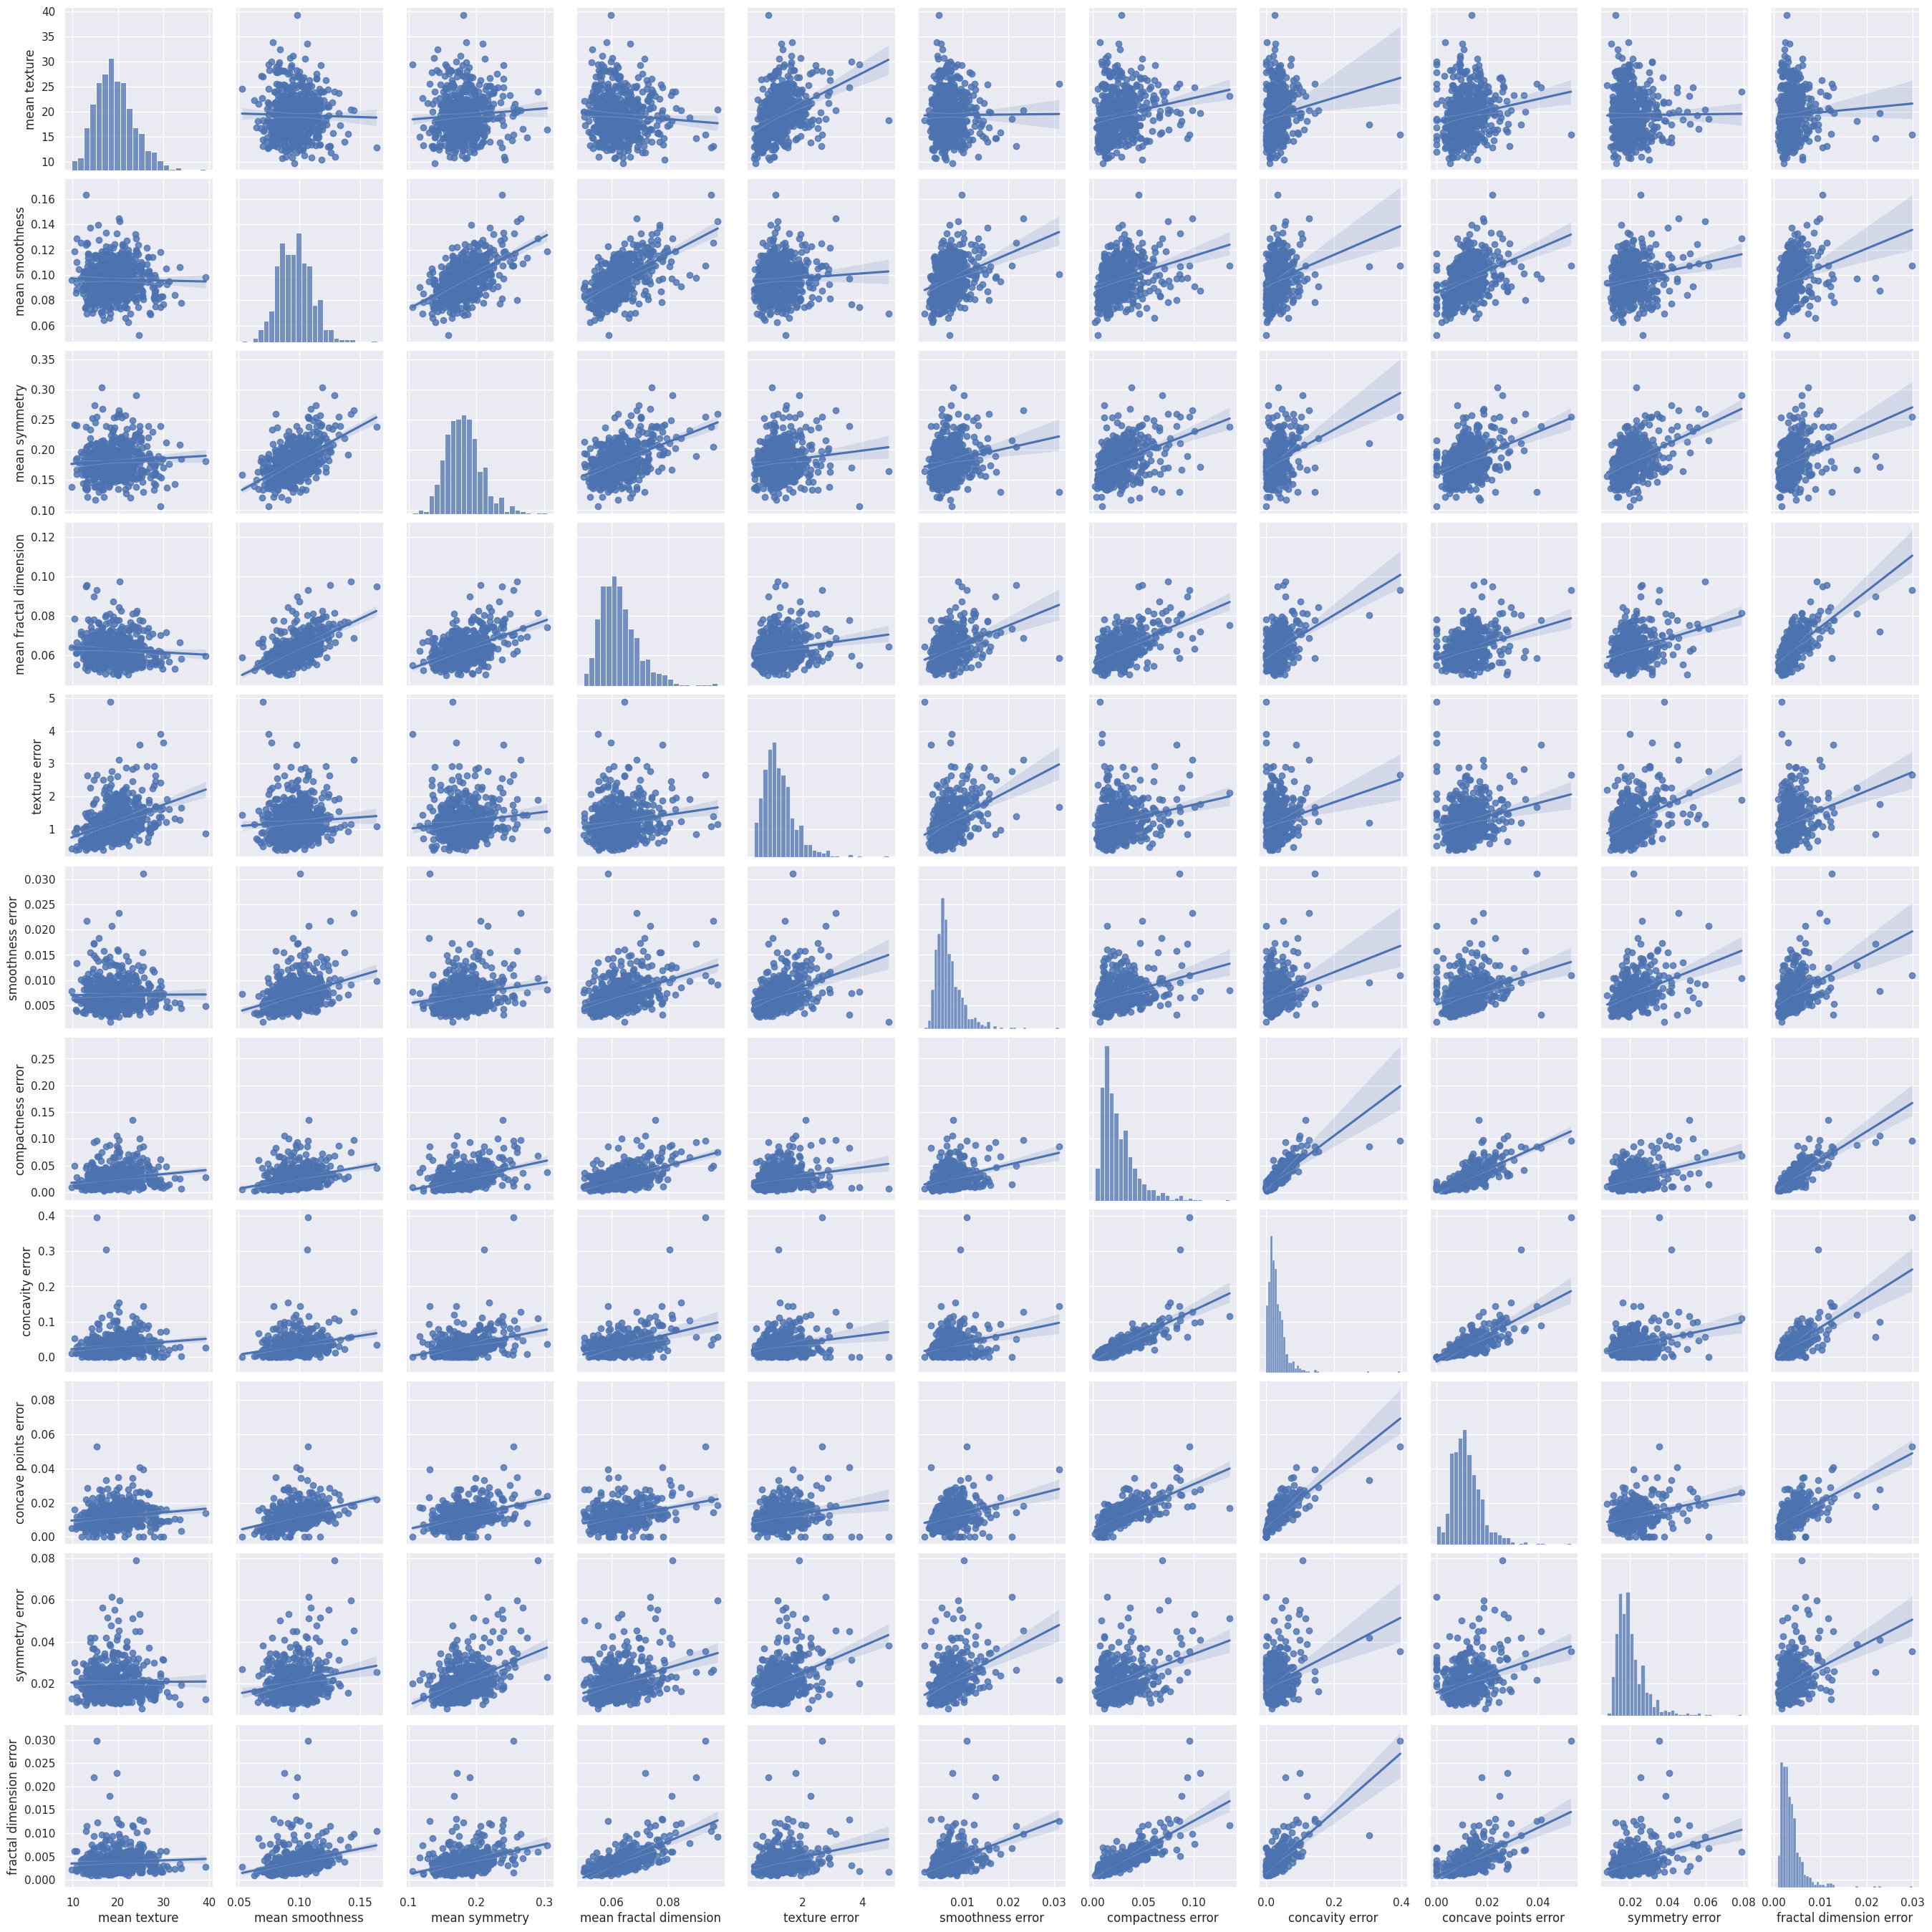

In [ ]:
sns.pairplot(df11, kind="reg")
plt.show()

# 4-4. Scaling 

In [ ]:
df11.describe()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,0.096360,0.181162,0.062798,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,4.301036,0.014064,0.027414,0.007060,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,9.710000,0.052630,0.106000,0.049960,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,16.170000,0.086370,0.161900,0.057700,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,18.840000,0.095870,0.179200,0.061540,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,21.800000,0.105300,0.195700,0.066120,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,39.280000,0.163400,0.304000,0.097440,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


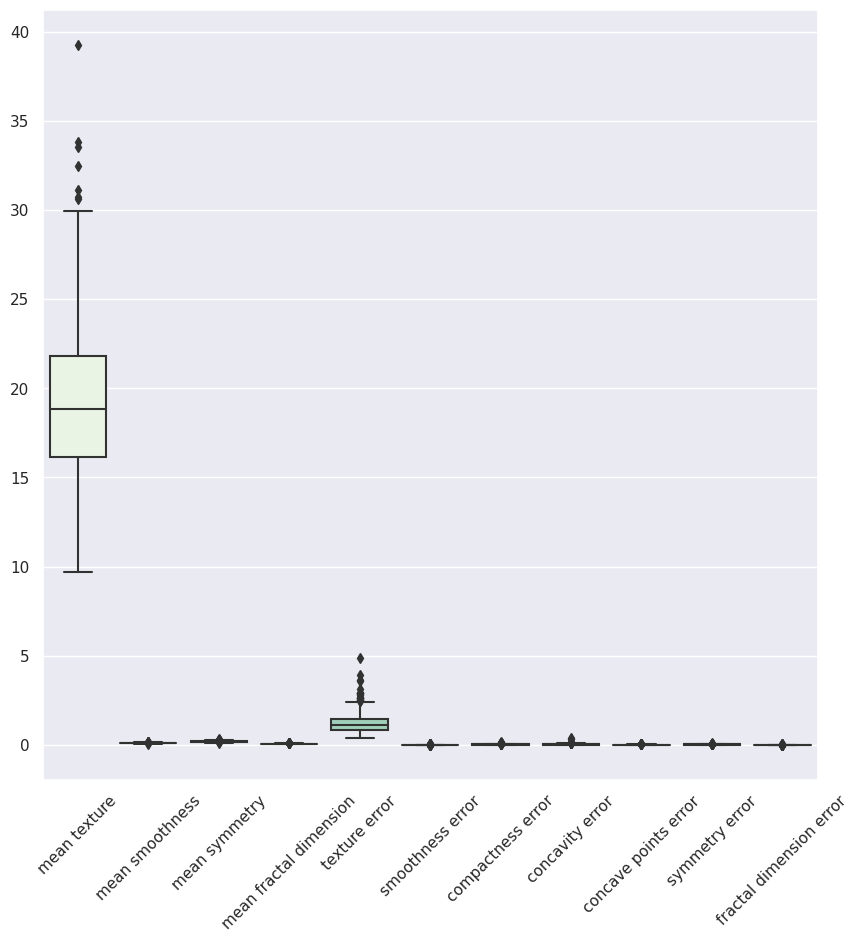

In [ ]:
# 데이터 값들의 분포 확인 
df11_columns = df11.columns.tolist()
fig, ax = plt.subplots()

sns.set_style('whitegrid')
sns.boxplot(data = [df11[df11_columns[0]],
                    df11[df11_columns[1]],
                    df11[df11_columns[2]],
                    df11[df11_columns[3]],
                    df11[df11_columns[4]],
                    df11[df11_columns[5]],
                    df11[df11_columns[6]],
                    df11[df11_columns[7]],
                    df11[df11_columns[8]],
                    df11[df11_columns[9]],
                    df11[df11_columns[10]]],
            ax=ax, 
            palette='GnBu') 

plt.xticks(range(11), df11_columns, rotation=45)
plt.show()

### features간 스케일 조정을 위해 Standard scaling으로 flattening 해줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

df2 = df11.copy()

stdscaler = StandardScaler()
stdscaler.fit(df2)

df2 = pd.DataFrame(stdscaler.transform(df2), columns=df2.columns)
df2

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,-2.073335,1.568466,2.217515,2.255747,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,-0.353632,-0.826962,0.001392,-0.868652,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,0.456187,0.942210,0.939685,-0.398008,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,0.253732,3.283553,2.867383,4.910919,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,-1.151816,0.280372,-0.009560,-0.562450,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328
...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,1.041842,-0.312589,-0.931027,0.071025,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980
565,2.085134,0.102458,-0.217664,-1.058611,2.260938,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556
566,2.045574,-0.840484,-0.809117,-0.895587,-0.257371,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727
567,2.336457,1.525767,2.137194,1.043695,0.686088,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057


In [ ]:
df2.describe()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02
mean,6.868164e-17,-8.366672e-16,1.748260e-16,4.745277e-16,-1.123881e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00
min,-2.229249e+00,-3.112085e+00,-2.744117e+00,-1.819865e+00,-1.554264e+00,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00
25%,-7.259631e-01,-7.109628e-01,-7.032397e-01,-7.226392e-01,-6.948092e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01
50%,-1.046362e-01,-3.489108e-02,-7.162650e-02,-1.782793e-01,-1.974976e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01
75%,5.841756e-01,6.361990e-01,5.307792e-01,4.709834e-01,4.665523e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01
max,4.651889e+00,4.770911e+00,4.484751e+00,4.910919e+00,6.655279e+00,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00


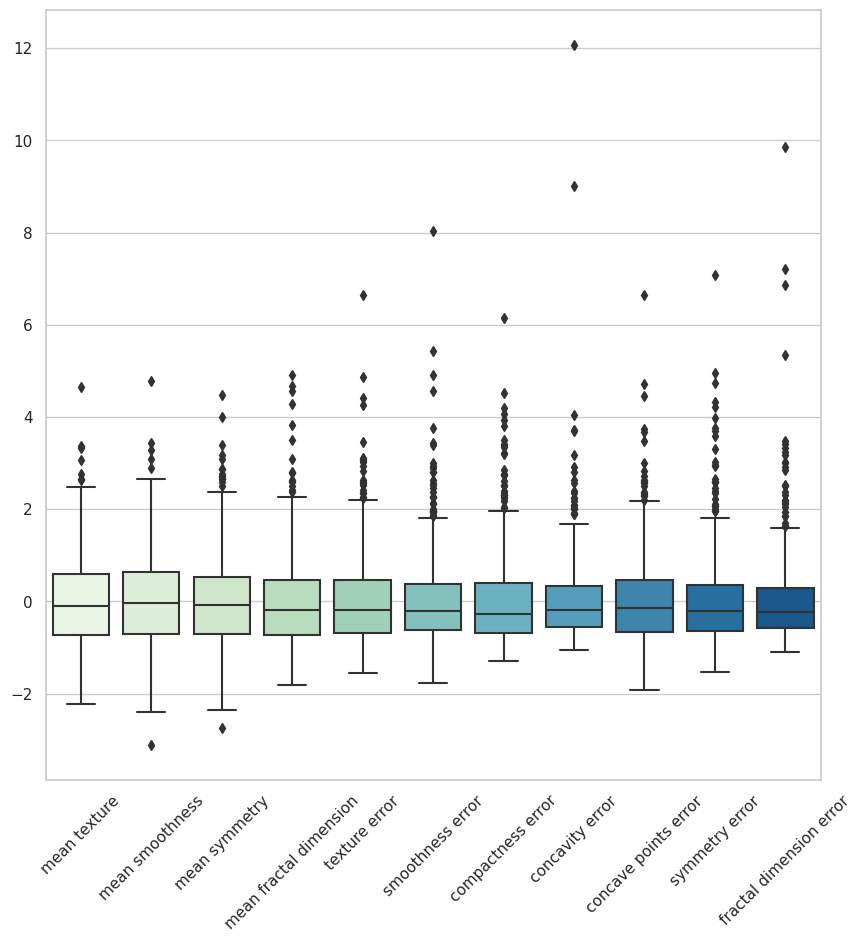

In [ ]:
# 데이터 값들의 분포 확인 
fig, ax = plt.subplots()

sns.set_style('whitegrid')
sns.boxplot(data = [df2[df11_columns[0]],
                    df2[df11_columns[1]],
                    df2[df11_columns[2]],
                    df2[df11_columns[3]],
                    df2[df11_columns[4]],
                    df2[df11_columns[5]],
                    df2[df11_columns[6]],
                    df2[df11_columns[7]],
                    df2[df11_columns[8]],
                    df2[df11_columns[9]],
                    df2[df11_columns[10]]],
            ax=ax, 
            palette='GnBu') 

plt.xticks(range(11), df11_columns, rotation=45)
plt.show()

- 이상치가 어느정도 존재하긴 하나 추가적인 normalization 과정은 생략하기로 합니다. 

## 4-5. Target Data

Target Info.
- 0: benign : 비악성 
  - 양성종양. 유방암은 아님.
  - 상대적으로 성장 속도가 느리고 전이(종양 세포가 다른 부위로 옮겨 가는 것)를 하지 않음.
- 1: malignant: 악성
  - 유방암
  - 악성은 성장이 빠르고 주위 조직과 다른 신체 부위로 퍼져 나가 생명까지 위협하는 수가 많음.

※ 참고: 국가암정보센터 (https://cancer.go.kr/lay1/program/S1T211C223/cancer/view.do?cancer_seq=4757&menu_seq=4761)


In [ ]:
labels = cancer['target']
labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant : ',malignant.shape)
print('benign : ',benign.shape)

malignant :  (212, 30)
benign :  (357, 30)


In [ ]:
df2['target'] = labels
df2

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,target
0,-2.073335,1.568466,2.217515,2.255747,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,0
1,-0.353632,-0.826962,0.001392,-0.868652,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,0
2,0.456187,0.942210,0.939685,-0.398008,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0
3,0.253732,3.283553,2.867383,4.910919,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0
4,-1.151816,0.280372,-0.009560,-0.562450,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,1.041842,-0.312589,-0.931027,0.071025,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0
565,2.085134,0.102458,-0.217664,-1.058611,2.260938,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,0
566,2.045574,-0.840484,-0.809117,-0.895587,-0.257371,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0
567,2.336457,1.525767,2.137194,1.043695,0.686088,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,0


# 5. Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df2.drop(['target'], axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
lgr_pred = lgr.predict(X_test)
print(lgr_pred)

[1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics

In [ ]:
confusion_matrix(y_test, lgr_pred)

array([[55,  8],
       [ 9, 99]])

In [ ]:
acccuracy = accuracy_score(y_test, lgr_pred)
precision = precision_score(y_test, lgr_pred)
recall = recall_score(y_test, lgr_pred)
f1 = f1_score(y_test, lgr_pred)
roc_auc = roc_auc_score(y_test, lgr_pred)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.901, 정밀도: 0.925, 재현율: 0.917,  F1: 0.921


In [ ]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.895


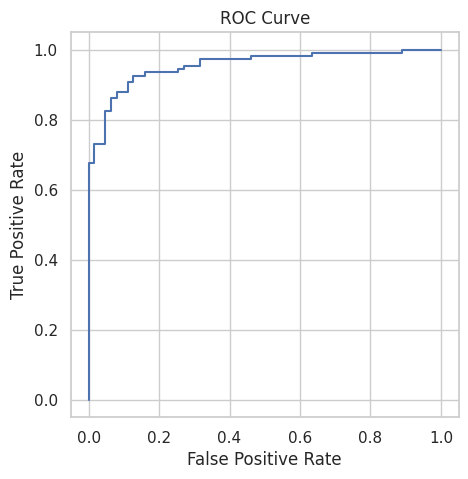

In [ ]:
# ROC Curve 그리기 

lgr_pred_proba = lgr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, lgr_pred_proba)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
coeff = pd.DataFrame(lgr.coef_, columns=X_train.columns).transpose()
coeff.sort_values(by=0, ascending=False)

,0
mean fractal dimension,1.687909
smoothness error,0.961468
fractal dimension error,0.855520
texture error,0.796726
symmetry error,0.292695
mean symmetry,-0.671908
concavity error,-0.686683
compactness error,-0.701296
concave points error,-1.200749
mean texture,-1.551384


## cf. (Case) Without Preprocessing (for comparison)

In [ ]:
df_o = df.copy()
df_o['target'] = labels

xo = df_o.drop(['target'], axis=1)
yo = df_o['target']

Xo_train, Xo_test, yo_train, yo_test = train_test_split(xo, yo, test_size=0.3, random_state=42)

lgr_o = LogisticRegression()
lgr_o.fit(Xo_train, yo_train)

LogisticRegression()

In [ ]:
lgr_o_pred = lgr_o.predict(Xo_test)

confusion_matrix(yo_test, lgr_o_pred)

array([[ 59,   4],
       [  1, 107]])

In [ ]:
acccuracy_o = accuracy_score(yo_test, lgr_o_pred)
precision_o = precision_score(yo_test, lgr_o_pred)
recall_o = recall_score(yo_test, lgr_o_pred)
f1_o = f1_score(yo_test, lgr_o_pred)
roc_auc_o = roc_auc_score(yo_test, lgr_o_pred)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy_o,precision_o,recall_o,f1_o))

정확도: 0.971, 정밀도: 0.964, 재현율: 0.991,  F1: 0.977


In [ ]:
print('ROC_AUC: {0:.3f}'.format(roc_auc_o))

ROC_AUC: 0.964


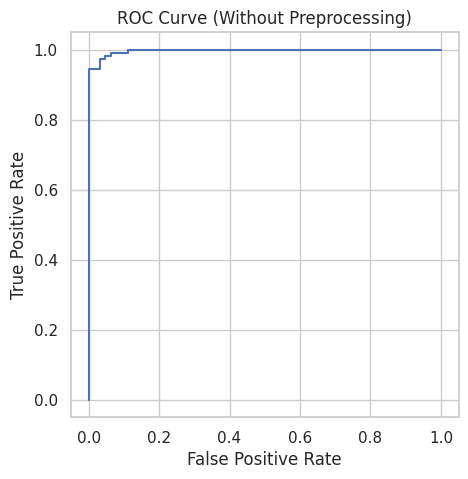

In [ ]:
# ROC Curve 그리기 (Original Dataset for comparison)(Without Preprocessing)

lgr_o_pred_proba = lgr_o.predict_proba(Xo_test)[::,1]
fpro, tpro, _ = metrics.roc_curve(yo_test, lgr_o_pred_proba)

plt.figure(figsize=(5,5))
plt.plot(fpro,tpro)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve (Without Preprocessing)')
plt.show()

In [ ]:
coeff_o = pd.DataFrame(lgr_o.coef_, columns=Xo_train.columns).transpose()
coeff_o.sort_values(by=0, ascending=False)

,0
worst radius,1.045432
mean radius,1.026047
mean texture,0.488842
texture error,0.455455
mean perimeter,0.243943
perimeter error,0.067741
radius error,0.033576
smoothness error,-0.003529
fractal dimension error,-0.003582
mean fractal dimension,-0.011448


# 6. Conclusion
- Raw dataset이 사이킷런의 기본제공 데이터셋으로서, 애초 상당히 잘 정제되어 있습니다.
- Features drop, Standard Scaling 등 전처리를 거쳐 모델링을 진행하였습니다.
- 다만 테스트셋 스코어가 전처리를 하지 않은 raw dataset으로 모델링 수행할 경우 오히려 더 좋게 나타났습니다.
- 하지만 raw dataset 대비 변수를 절반 이상(30개->11개)로 줄였음에도 유의미한 스코어를 기록했다고 판단되며, 모델의 일반화 관점에서 전처리 과정을 수행하는 것은 유의미하다고 판단합니다. 다만, features간 high correlation 빈도를 가지고 변수를 drop하는 것이 과연 적절한지, 더 나은 방향이 어떤 것이 있을지에 대한 고민이 필요할 것 같습니다.